<a href="https://colab.research.google.com/github/manishgurungxon/MachineLearningPy/blob/main/Percapitaincome_year_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#First we import neccesary libs for linear regression
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

In [22]:
#Import csv files for dependent and independent variables
df = pd.read_csv("canada_per_capita_income.csv")
#This will the years for predictions
predict_df = pd.read_csv("predict.csv")

In [3]:
df.head()

,year,per_capita_income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [4]:
df.describe()

,year,per_capita_income
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [5]:
%matplotlib inline

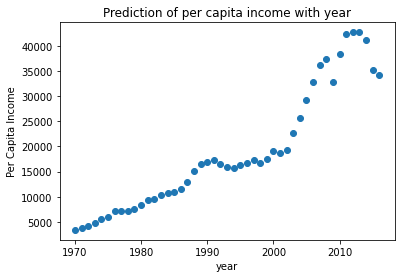

In [6]:
plt.scatter(df.year, df.per_capita_income)
plt.title("Prediction of per capita income with year")
plt.xlabel("year")
plt.ylabel("Per Capita Income")
plt.show()

In [7]:
%matplotlib inline

In [8]:
#Now create a new data frame by seperating dependent and independent variables from the dataset
new_df = df.drop("per_capita_income", axis="columns")

In [9]:
print(new_df)

    year
0   1970
1   1971
2   1972
3   1973
4   1974
5   1975
6   1976
7   1977
8   1978
9   1979
10  1980
11  1981
12  1982
13  1983
14  1984
15  1985
16  1986
17  1987
18  1988
19  1989
20  1990
21  1991
22  1992
23  1993
24  1994
25  1995
26  1996
27  1997
28  1998
29  1999
30  2000
31  2001
32  2002
33  2003
34  2004
35  2005
36  2006
37  2007
38  2008
39  2009
40  2010
41  2011
42  2012
43  2013
44  2014
45  2015
46  2016


In [10]:
pci = df.per_capita_income

In [11]:
pci

0      3399.299037
1      3768.297935
2      4251.175484
3      4804.463248
4      5576.514583
5      5998.144346
6      7062.131392
7      7100.126170
8      7247.967035
9      7602.912681
10     8355.968120
11     9434.390652
12     9619.438377
13    10416.536590
14    10790.328720
15    11018.955850
16    11482.891530
17    12974.806620
18    15080.283450
19    16426.725480
20    16838.673200
21    17266.097690
22    16412.083090
23    15875.586730
24    15755.820270
25    16369.317250
26    16699.826680
27    17310.757750
28    16622.671870
29    17581.024140
30    18987.382410
31    18601.397240
32    19232.175560
33    22739.426280
34    25719.147150
35    29198.055690
36    32738.262900
37    36144.481220
38    37446.486090
39    32755.176820
40    38420.522890
41    42334.711210
42    42665.255970
43    42676.468370
44    41039.893600
45    35175.188980
46    34229.193630
Name: per_capita_income, dtype: float64

In [12]:
#Use linear Regression from sklearn
from sklearn.linear_model import LinearRegression
#very important step when using linearregression
lin_reg = LinearRegression()
#Fitting the value to the model
lin_reg.fit(new_df,pci)

LinearRegression()

In [13]:
print(lin_reg.coef_)
# This means that the salary is going to increase 22256.3510 from the example

[828.46507522]


In [19]:
lin_reg.predict([[2017],[2019]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([38803.29886875, 40460.22901919])

In [23]:
predictions = lin_reg.predict(predict_df)

In [24]:
predictions

array([40460.22901919, 41288.69409442, 42117.15916964, 42945.62424486,
       43774.08932009, 44602.55439531, 45431.01947053, 46259.48454575,
       47087.94962098, 47916.4146962 , 48744.87977142, 49573.34484664,
       50401.80992187, 51230.27499709, 52058.74007231, 52887.20514754,
       53715.67022276, 54544.13529798, 55372.6003732 ])

In [25]:
predict_df['new_pci_year']=predictions

In [26]:
predict_df

,year,new_pci_year
0,2019,40460.229019
1,2020,41288.694094
2,2021,42117.159170
3,2022,42945.624245
4,2023,43774.089320
5,2024,44602.554395
6,2025,45431.019471
7,2026,46259.484546
8,2027,47087.949621
9,2028,47916.414696


In [29]:
#Exporting the file as csv
predict_df.to_csv(r'new_canada_per_capita_income.csv', index=False)